# Linear and Nonlinear Classification

Classification methods:
+ Support vector
+ Decision tree
+ Ensemble (random forest)
+ Distribution fitting (Naive Bayes)

In [1]:
import pandas
iris = pandas.read_csv('../Datasets/iris.csv')
admission = pandas.read_csv('../Datasets/admission.csv')
cancer = pandas.read_csv('../Datasets/breast-cancer-wisconsin.csv')
diabetes = pandas.read_csv('../Datasets/diabetes.csv')


from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
def assess_performance(mod, X, y):
#     result = cross_validate(mod, X, y, cv=cv, scoring=['accuracy','precision','recall'])
    cv = ShuffleSplit(n_splits=100)
    result = cross_validate(mod, X, y, cv=cv, scoring=['accuracy', 'precision'])
    print('Model', mod)
    print('\tAccuracy: {} {}'.format(result['test_accuracy'].mean().round(2), result['test_accuracy'].std().round(2)))
#     print('\tPrecision: {} {}'.format(result['test_precision'].mean().round(2), result['test_precision'].std().round(2)))
#     print('\tRecall: {} {}'.format(result['test_recall'].mean().round(2), result['test_recall'].std().round(2)))    

### Overview

Decision tree is non-linear and can be used for regression (y-continuous) and classification (y-discrete).

Random forest is an ensemble method.
+ A random forest is a set of trees, which are randomly constructed.
+ There are two aspects in this randomness. First, a subset of features are randomly selected to build a random tree.  Secondly, the way that the decision tree is constructed at each branch is also randomized.

An ensemble method polls the majority decision from its classifiers.

Another non-linear approach is to fit data into distributions of features, e.g. Naive Bayes classification.  This approach can provide a probability for each prediction.
+ Naive Bayes assumes that the features are independent from each other.

Suppor Vector is a very popular linear method of classification.





In [3]:
import seaborn
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


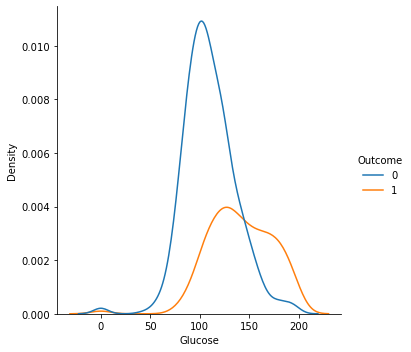

In [4]:
seaborn.displot(data=diabetes, x='Glucose', kind='kde', hue='Outcome')

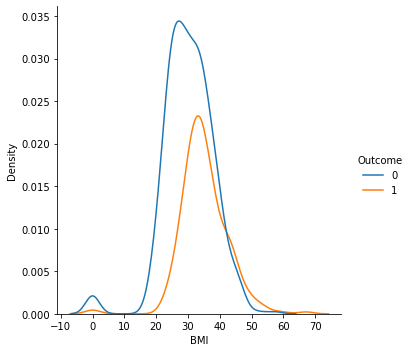

In [5]:
seaborn.displot(data=diabetes, x='BMI', kind='kde', hue='Outcome')

In [4]:
model = SVC(kernel='linear')

In [8]:
y=diabetes['Outcome']
X=diabetes.drop(columns=['Outcome'])


In [6]:
from sklearn.svm import LinearSVC

svc = LinearSVC(dual = False)

In [9]:
assess_performance(svc, X, y)

Model LinearSVC(dual=False)
	Accuracy: 0.77 0.05


In [23]:
1+2

3

In [24]:
model.fit(X,y)

SVC(kernel='linear')

In [25]:
model.coef_

array([[ 9.14692398e-02,  3.00467168e-02, -1.09051239e-02,
        -4.81652166e-03, -4.21253324e-04,  7.33928948e-02,
         7.15054906e-01,  7.26041287e-03]])

In [26]:
model.intercept_

array([-6.74051604])

In [27]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [32]:
sorted(list(zip(model.coef_[0], list(X.columns))))

[(-0.010905123865086352, 'BloodPressure'),
 (-0.004816521660359285, 'SkinThickness'),
 (-0.00042125332402065396, 'Insulin'),
 (0.0072604128722559835, 'Age'),
 (0.030046716799915885, 'Glucose'),
 (0.07339289483888933, 'BMI'),
 (0.09146923980409838, 'Pregnancies'),
 (0.71505490578636, 'DiabetesPedigreeFunction')]